# Part II: Analysis of New Data
## books.csv contains information on customer purchases from amazon.com and barnesandnoble.com in 2007 (see variable domain). Various variables on customer characteristics are also in the dataset. Information available on these variables is below. There are a few other variables in the dataset – the date of each purchase (date), the product purchased (product), the number of copies purchased (qty), and the price paid (price); we will not use date, product, and price for this project.

In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import nbinom


# 1. Read books.csv and generate two new datasets –
## a) books01.csv, with the structure of the data set used in the billboard exposure sexample (i.e.,withonly two columns – (i) the number purchases, and (ii) the number of people making the corresponding number of purchases),

<b>Filter for barnesandnoble.com purchases<b>

In [2]:
data = pd.read_csv('books.csv')
bn_purchases = data[data['domain'] == 'barnesandnoble.com']

<b>Create books01.csv by counting the number of purchases per user<b>

In [3]:
books01_data = bn_purchases.groupby('userid')['qty'].sum().reset_index()
books01_data = books01_data['qty'].value_counts().reset_index()

<b>Create two columns<b>

In [4]:
books01_data.columns = ['NumberofPurchases', 'NumberofPeople']
books01_data = books01_data.sort_values(by='NumberofPurchases')

In [5]:
books01_data.head()

,NumberofPurchases,NumberofPeople
0,1,753
1,2,362
2,3,175
3,4,126
4,5,82


<b>Save books01.csv to a file<b>

In [6]:
books01_file_path = 'books01.csv'
books01_data.to_csv(books01_file_path, index=False)

<b>Display the first and last 10 records of books01.csv<b>

In [7]:
print(books01_data.head(10).to_string(index=False))
print(books01_data.tail(10).to_string(index=False))

 NumberofPurchases  NumberofPeople
                 1             753
                 2             362
                 3             175
                 4             126
                 5              82
                 6              74
                 7              30
                 8              48
                 9              31
                10              20
 NumberofPurchases  NumberofPeople
                46               1
                47               1
                50               1
                56               1
                58               1
                62               1
                63               1
                83               1
                86               1
               111               1


## b) books02.csv, with the structure of the dataset used in the khakichinos example, with a new column containing a count of the number of books purchased from barnesandnoble.com by each customer, while keeping the demographic variables (remember to drop date, product, and price).


<b>Drop date, product, and price<b>

In [8]:
bn_purchases = bn_purchases.drop(columns=['date', 'product','price'])


In [9]:
bn_purchases

,userid,education,region,hhsz,age,income,child,race,country,domain,qty
19,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
20,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
21,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1
45,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1
46,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1
...,...,...,...,...,...,...,...,...,...,...,...
40932,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40933,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40934,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1
40935,15541746,NaN,1.0,4,6.0,3,1,1,0,barnesandnoble.com,1


<b>Selecting relevant columns for books02.csv<b>

In [10]:
books02_data = bn_purchases.groupby('userid').agg({
    'education': 'first',
    'region': 'first',
    'hhsz': 'first',
    'age': 'first',
    'income': 'first',
    'child': 'first',
    'race': 'first',
    'country': 'first',
    'qty': 'sum'
}).reset_index()

<b>Adding the number of books purchased column<b>

In [11]:
books02_data = books02_data.rename(columns={'qty': 'number_of_books_purchased'})

In [12]:
books02_data

,userid,education,region,hhsz,age,income,child,race,country,number_of_books_purchased
0,6365661,5.0,1.0,2,11.0,7,0,1,0,1
1,6396922,2.0,2.0,2,8.0,4,0,1,0,1
2,8999933,4.0,3.0,5,10.0,3,1,1,0,1
3,9573834,NaN,4.0,2,10.0,5,1,1,0,2
4,9576277,NaN,1.0,3,8.0,7,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...
1807,15695968,1.0,2.0,5,10.0,2,1,1,0,5
1808,15696910,NaN,3.0,4,8.0,4,1,1,0,2
1809,15698055,NaN,3.0,4,4.0,4,1,1,0,9
1810,15698341,NaN,4.0,6,8.0,6,1,1,0,2


<b>Save books02.csv to a file<b>

In [13]:
books02_file_path = 'books02.csv'
books02_data.to_csv(books02_file_path, index=False)

<b>Display the first and last 10 records of books02.csv<b>

In [14]:
print(books02_data.head(10).to_string(index=False))
print(books02_data.tail(10).to_string(index=False))

  userid  education  region  hhsz   age  income  child  race  country  number_of_books_purchased
 6365661        5.0     1.0     2  11.0       7      0     1        0                          1
 6396922        2.0     2.0     2   8.0       4      0     1        0                          1
 8999933        4.0     3.0     5  10.0       3      1     1        0                          1
 9573834        NaN     4.0     2  10.0       5      1     1        0                          2
 9576277        NaN     1.0     3   8.0       7      1     1        0                          5
 9581009        NaN     2.0     2   7.0       5      1     1        0                          1
 9595310        4.0     2.0     2   8.0       2      1     1        0                          6
 9611445        2.0     4.0     2  11.0       6      1     1        1                          2
 9663372        4.0     4.0     3   9.0       7      1     1        0                         28
 9752844        3.0     4.0   

## Develop a Poisson model using books01.csv. Report your code, the estimated parameters and the maximum value of the log-likelihood (and any other information you believe is relevant).

<b>Read in the data<b>

In [15]:
books1_PP = pd.read_csv("books01.csv")
books1_PP.head()

,NumberofPurchases,NumberofPeople
0,1,753
1,2,362
2,3,175
3,4,126
4,5,82


<b>Define the funtions needed</b><br>
<b>1. the log-likelihood</b>

In [16]:
def ll_poisson(params, purchases, people):
    lam = params
    
    prob = []
    prob_t =[]
    #probSum = 0
    
# need to consider all periods
    pds = list(range(0, len(purchases)))
    for i in pds:
            prob.append(poisson.pmf(purchases[i],lam))
            prob_t.append(people[i]*np.log(prob[i]))
        
    return sum(prob_t)

<b>2. the negative of the log-likelihood</b>

In [17]:
def neg_ll_poisson(params, purchases, people):
    return(-np.sum(ll_poisson(params, purchases, people)))

<b>Specify the information needed for the optimizer</b>

In [18]:
exposures = books1_PP.NumberofPurchases
people = books1_PP.NumberofPeople
params = 1


In [19]:
print(params, ll_poisson(params, exposures, people))
print('neg:', neg_ll_poisson(params, exposures, people))

1 -11610.619782398968
neg: 11610.619782398968


<b>Review the result</b>

In [20]:
result_poisson = minimize(
    neg_ll_poisson, 
    params,
    args=(exposures, people))

In [21]:
result_poisson

      fun: 7237.867978907432
 hess_inv: array([[0.00215312]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([3.90397343])

<b>The estimated parameter (lambda) for the Poisson model is approximately 3.904, and the maximum value of the log-likelihood is approximately -7237.867.<b>

# Develop a Poisson model using books02.csv, i.e., by ignoring the independent variables available. Report your code and confirm that the estimated parameters and the maximum value of the log-likelihood are identical to those obtained with the Poisson model developed using books01.csv.
## Predict the number of people with 0, ..., 20, 20+ visits based on the Poisson model. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted number of visits.


In [22]:
data2= books02_data['number_of_books_purchased']

def ll_poisson2(params, data2):
    lam = params
    log_likelihood = np.sum(poisson.logpmf(data2, lam))
    return log_likelihood

# Define the negative log-likelihood function
def neg_ll_poisson2(params, data2):
    return -ll_poisson2(params, data2)

# Initial guess for lambda (mu)
initial_guess = 1

# Fit the Poisson model using optimization
result_poisson2 = minimize(neg_ll_poisson2, initial_guess, args=(data2,))

# Extract the estimated parameter
lambda_hat = result_poisson.x[0]

# Print results
print(f"Estimated Poisson parameter (lambda): {lambda_hat:.2f}")
print("Maximum Log-Likelihood:", -result_poisson2.fun)
print(result_poisson2)

Estimated Poisson parameter (lambda): 3.90
Maximum Log-Likelihood: -7237.867978907432
      fun: 7237.867978907432
 hess_inv: array([[0.00215283]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([3.9039734])


<b>The estimated parameter (lambda) for the Poisson model is approximately 3.903, and the maximum value of the log-likelihood is approximately -7237.867. We can see that the results are similar to results from Question 2.<b>

In [23]:
lam_nbd  = result_poisson2.x[0]
lam_nbd
predTo = len(books1_PP.NumberofPeople[:23])
purchases = books1_PP.NumberofPurchases[:23]
people_s = books1_PP.NumberofPeople[:23]

<b>Prediction</b>

In [24]:
def predict(lam_nbd, purchases, predTo, predC):
# need to make predictions for all periods
    pds = list(range(0, predTo))
    for i in pds:
        predC[i] = poisson.pmf(exposures[i],lam_nbd) * np.sum(people)        

In [25]:
predC = np.zeros(predTo)

In [26]:
predict(lam_nbd, purchases, predTo, predC)


<b>Predicted results<b>

In [27]:
predC

array([1.42623450e+02, 2.78399078e+02, 3.62287531e+02, 3.53590222e+02,
       2.76081364e+02, 1.79635717e+02, 1.00184723e+02, 4.88898117e+01,
       2.12071694e+01, 8.27922252e+00, 2.93835132e+00, 9.55937116e-01,
       2.87073313e-01, 8.00518986e-02, 2.08346989e-02, 5.08363188e-03,
       1.16743316e-03, 2.53201555e-04, 5.20259019e-05, 1.01553869e-05,
       1.88792191e-06, 5.68652838e-08, 9.25002314e-09])

<b>The predicted number of people with 2 exposures is at approximately 3.622e+02.<b>

<b>Plot the actual values and predictions</b>

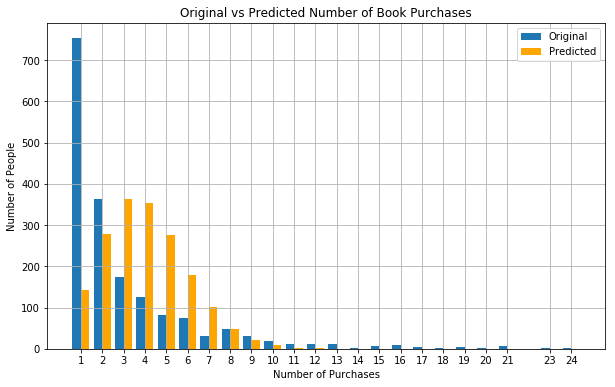

In [28]:
import matplotlib.pyplot as plt

# Plot the original and the predicted number of exposures
plt.figure(figsize=(10, 6))
plt.bar(purchases - 0.2, people_s, width=0.4, label='Original', align='center')
plt.bar(purchases + 0.2, predC, width=0.4, label='Predicted', align='center', color='orange')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of People')
plt.title('Original vs Predicted Number of Book Purchases')
plt.xticks(purchases)
plt.legend()
plt.grid(True)
plt.show()